In [1]:
import seaborn as sns
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt

# Visualizing relationships

#### Step 1 - Load in data and recast "0,1" columns as Strings (categorical variables)

In [10]:
(housing :=
 pl.read_csv('data/Saratoga_NY_Homes.csv')
 .with_columns(
     pl.col('Waterfront').cast(pl.String()),
     pl.col('New.Construct').cast(pl.String()),
     pl.col('Central.Air').cast(pl.String()),
     pl.col('Fireplaces?').cast(pl.String()),
     pl.col('Fuel.Type').cast(pl.String()),
     pl.col('Heat.Type').cast(pl.String()),
     pl.col('Sewer.Type').cast(pl.String())
 )
)

Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Fuel.Type,Heat.Type,Sewer.Type,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms,Fireplaces?
i64,f64,str,i64,i64,str,str,str,str,str,i64,i64,i64,i64,f64,i64,str
132500,0.09,"""0""",42,50000,"""0""","""0""","""3""","""4""","""2""",906,35,2,1,1.0,5,"""1"""
181115,0.92,"""0""",0,22300,"""0""","""0""","""2""","""3""","""2""",1953,51,3,0,2.5,6,"""0"""
109000,0.19,"""0""",133,7300,"""0""","""0""","""2""","""3""","""3""",1944,51,4,1,1.0,8,"""1"""
155000,0.41,"""0""",13,18700,"""0""","""0""","""2""","""2""","""2""",1944,51,3,1,1.5,5,"""1"""
86060,0.11,"""0""",0,15000,"""1""","""1""","""2""","""2""","""3""",840,51,2,0,1.0,3,"""0"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
289000,0.38,"""0""",32,24200,"""0""","""0""","""2""","""3""","""3""",2310,61,5,1,2.5,11,"""1"""
285000,0.94,"""0""",37,36200,"""0""","""0""","""2""","""3""","""3""",2564,61,4,1,2.5,11,"""1"""
194900,0.39,"""0""",9,20400,"""0""","""0""","""2""","""2""","""3""",1099,51,2,0,1.0,3,"""0"""


## Topic 1 - Visualizing the relationship between categorical predictors and a numeric response with boxplots.

#### Step 1 - Stacking the predictors

In [19]:
(cat_predictors :=
 housing
 .select(cs.by_name('Price') | cs.string())
 .unpivot(cs.string(),
          index = 'Price',
          variable_name = 'predictor',
          value_name = 'label')
 .to_pandas()
)

,Price,predictor,label
0,132500,Waterfront,0
1,181115,Waterfront,0
2,109000,Waterfront,0
3,155000,Waterfront,0
4,86060,Waterfront,0
...,...,...,...
12091,289000,Fireplaces?,1
12092,285000,Fireplaces?,1
12093,194900,Fireplaces?,0
12094,125000,Fireplaces?,1


#### Step 2 - Using `sns.catplot`

**Note.** To get boxplots, we use `kind='box'`

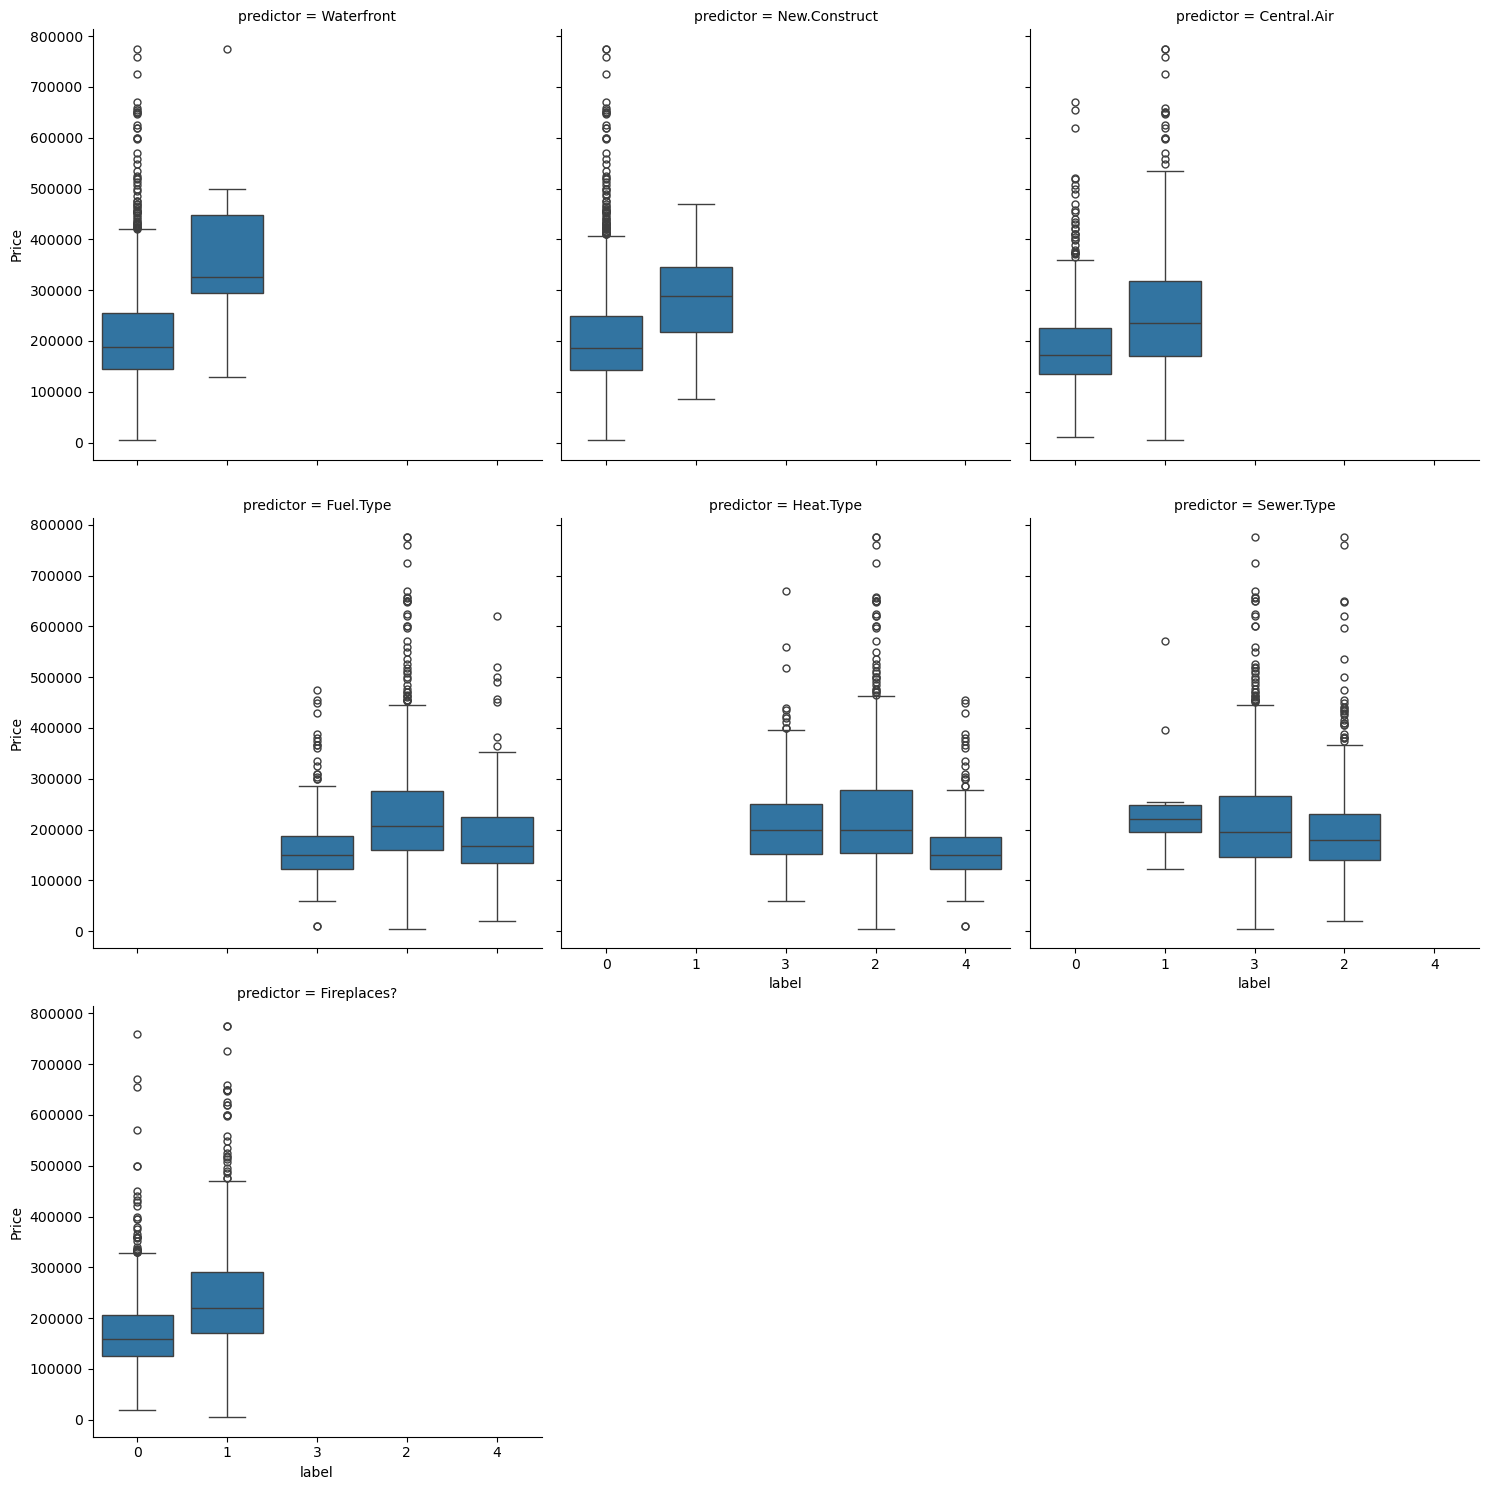

In [21]:
sns.catplot(
    data = cat_predictors, x = 'label', y = 'Price',
    col = 'predictor', kind = 'box', col_wrap = 3
)

## Topic 2 - Visualizing relationships between numeric predictors and a numeric target.

### Plotting the marginal distributions with a pairs plot

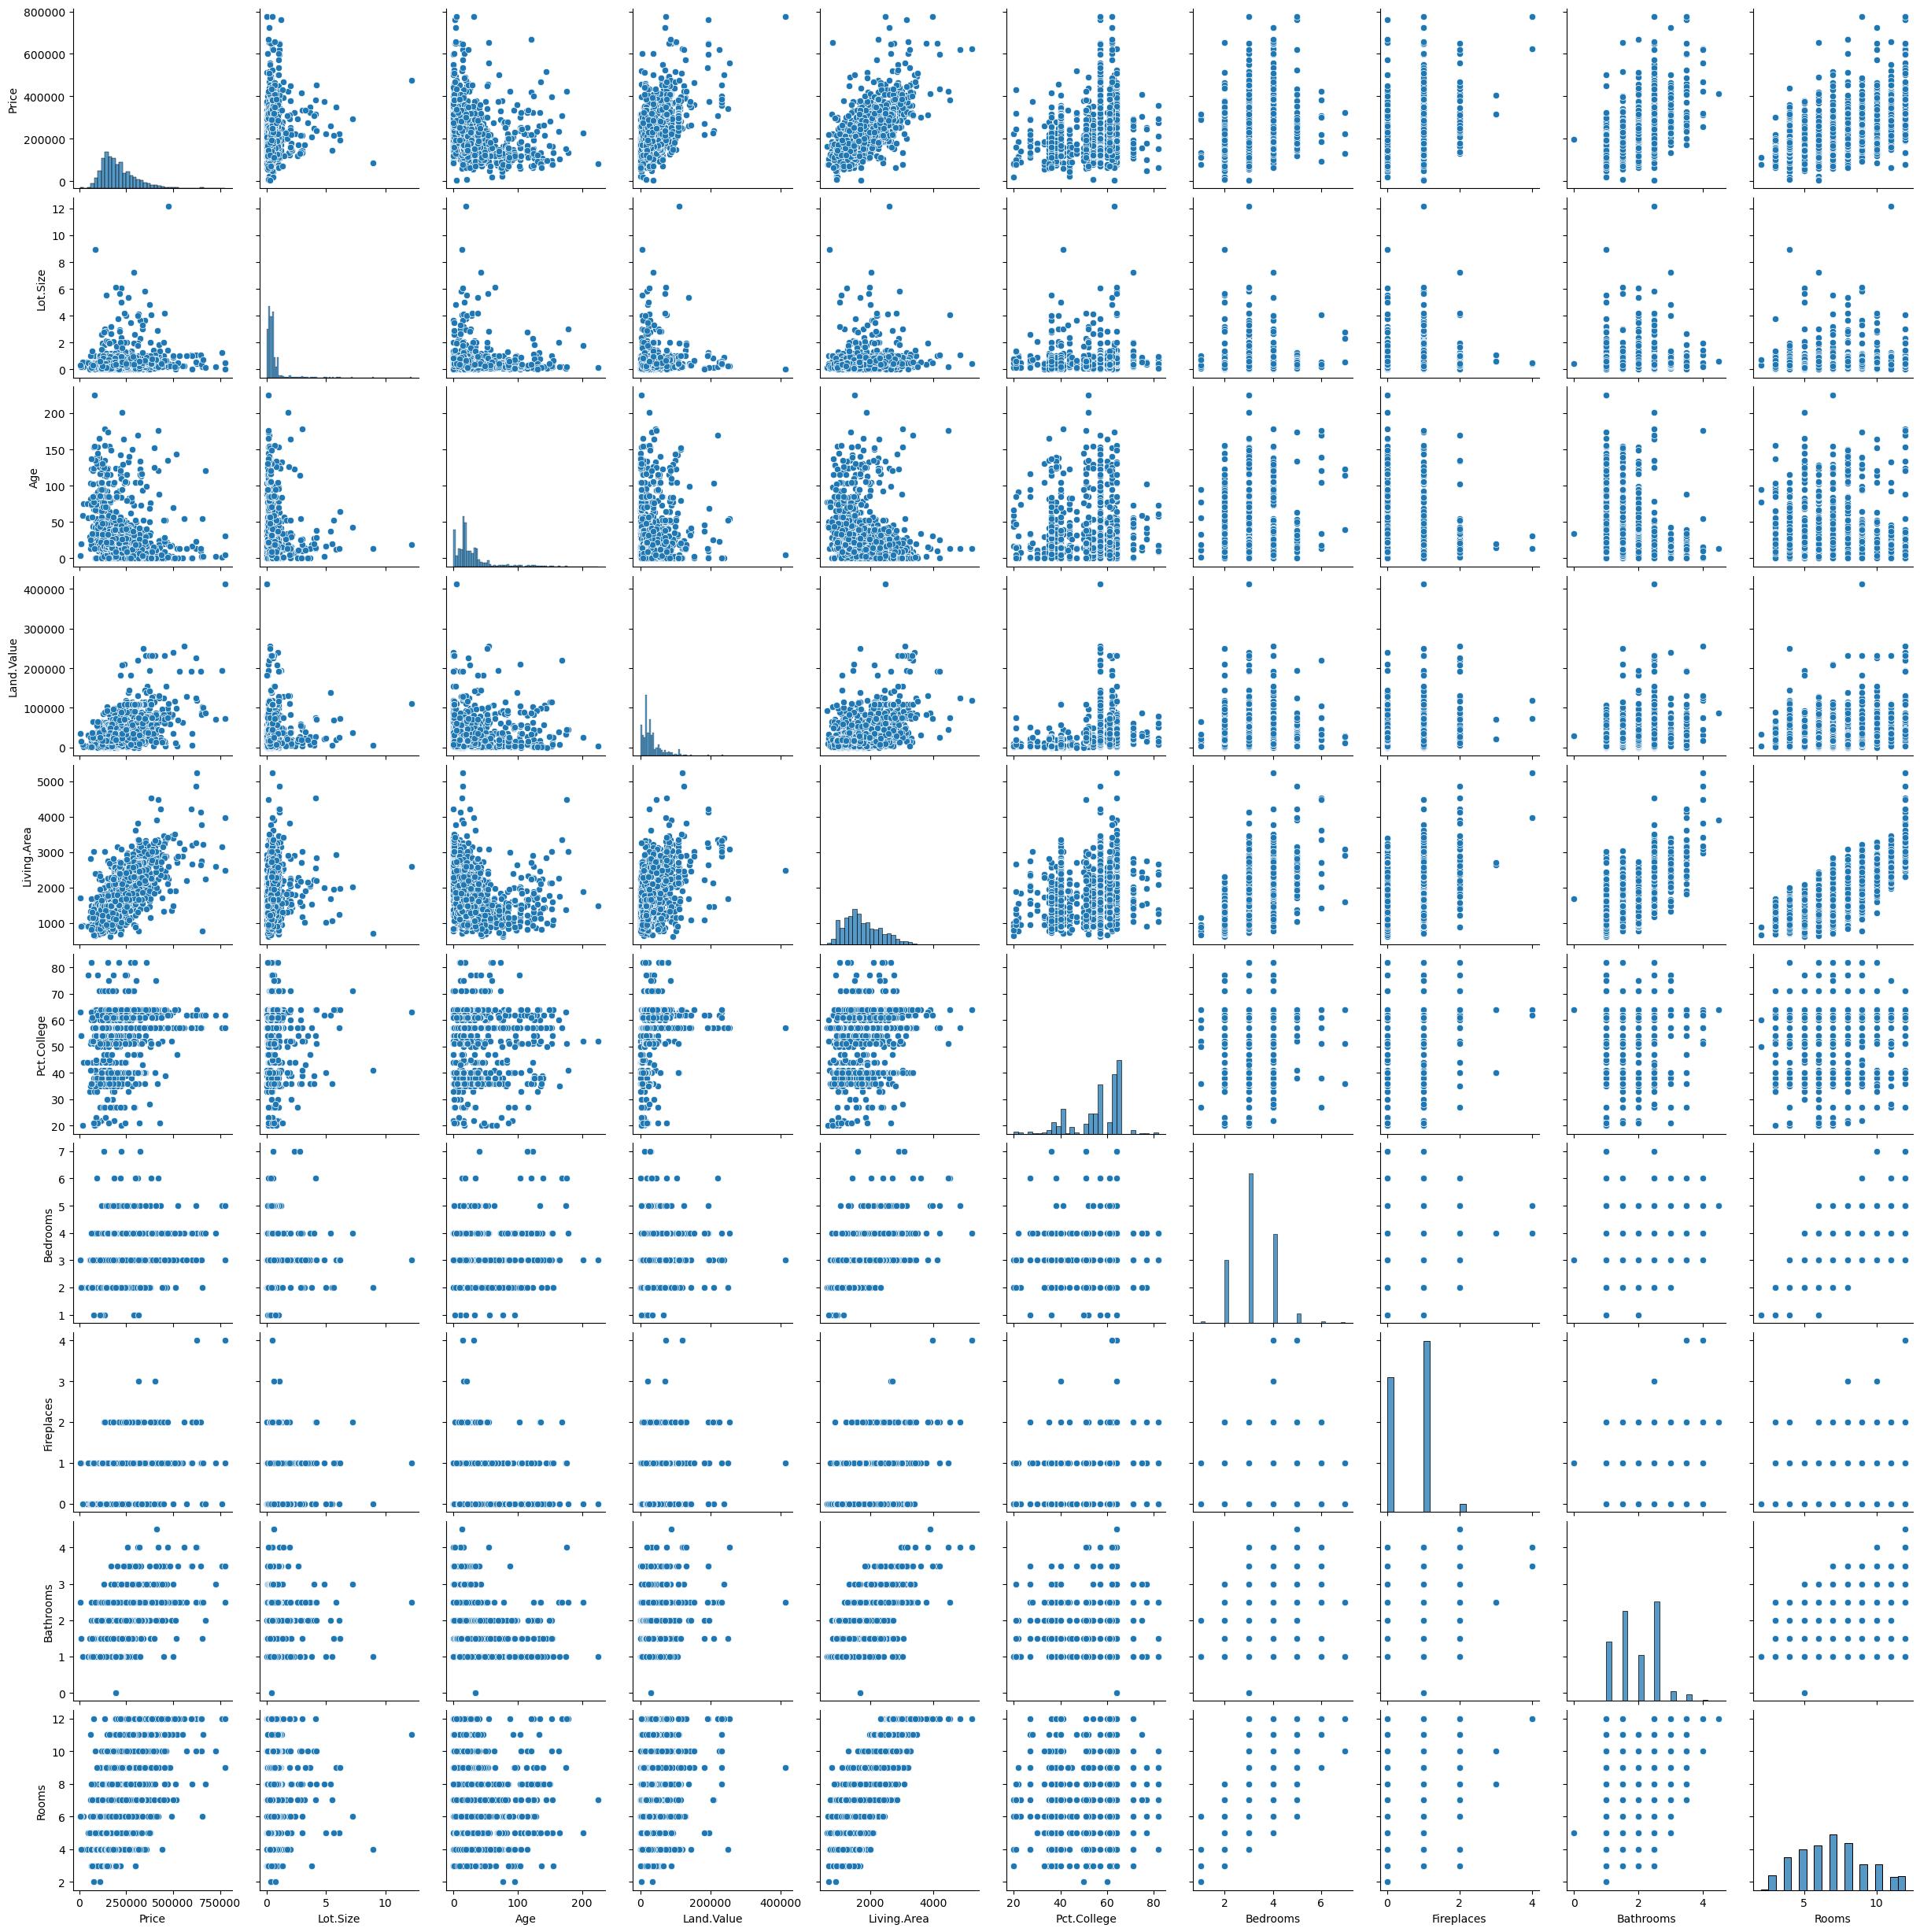

In [22]:
sns.pairplot(housing.to_pandas())

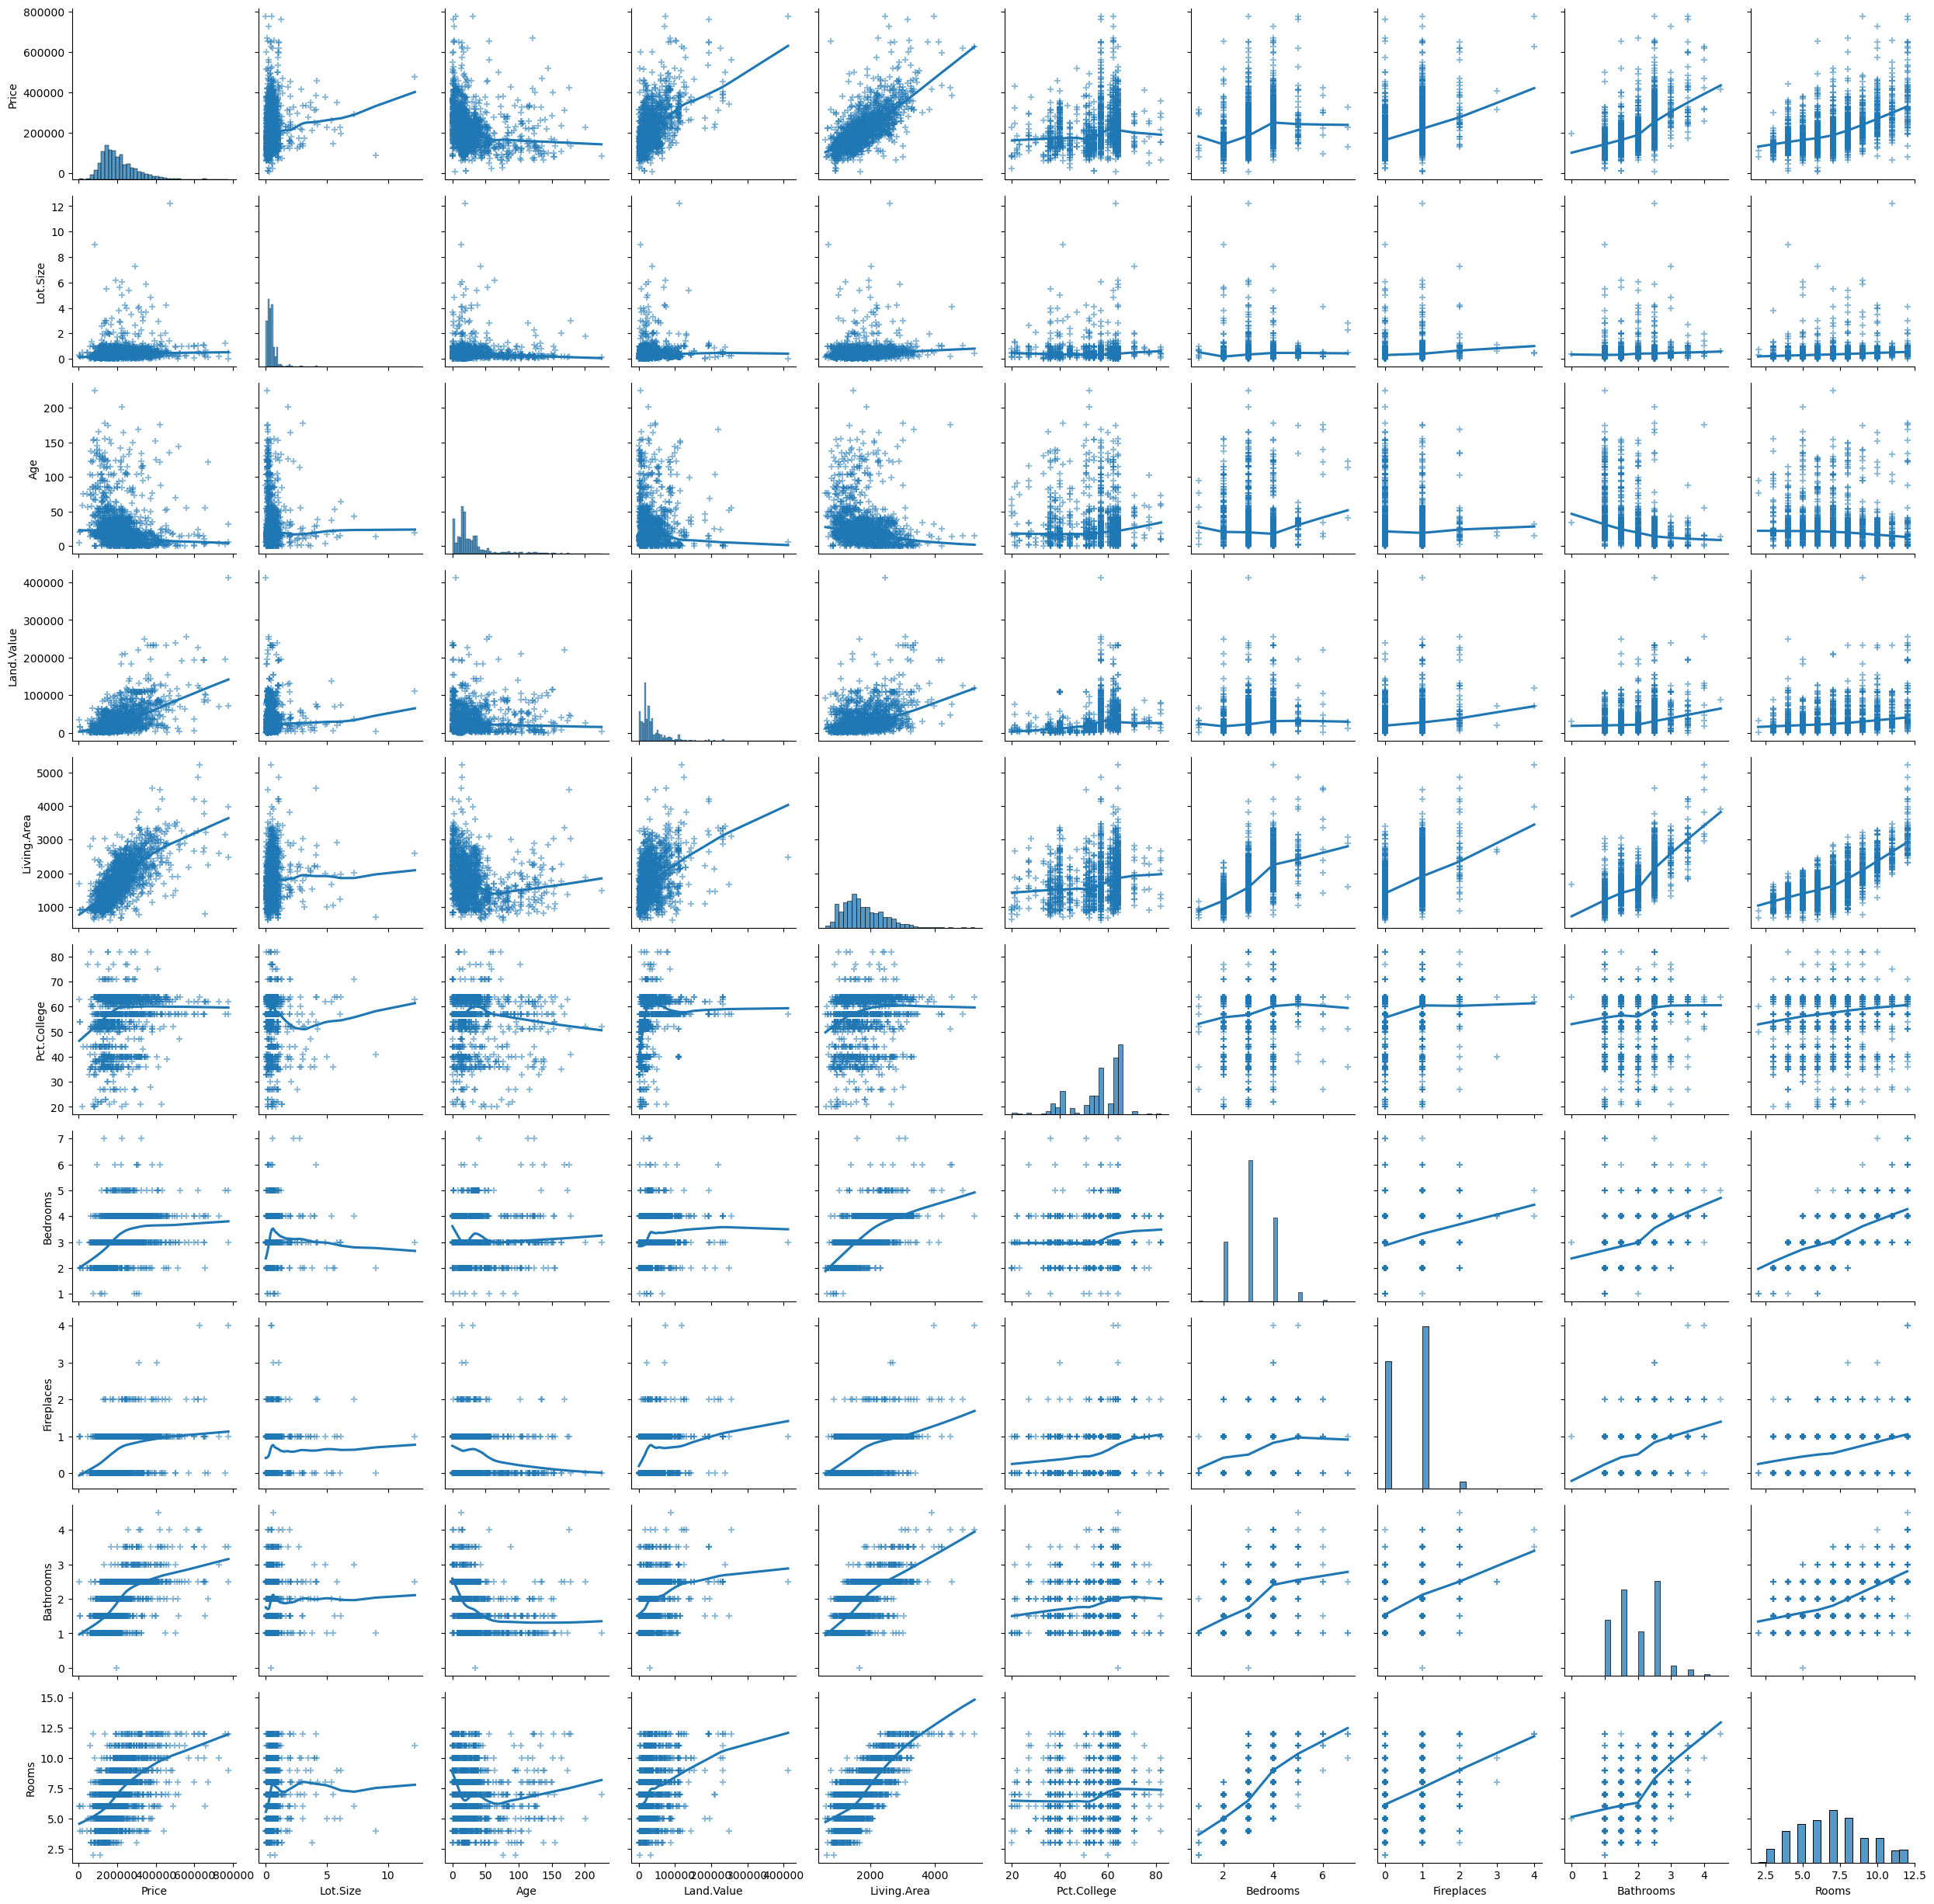

In [23]:
g = sns.PairGrid(housing.to_pandas())
g.map_diag(sns.histplot)
g.map_offdiag(sns.regplot,
              lowess=True,
              marker="+",
              scatter_kws={'alpha': 0.5}
              )

**Findings.** When looking at the relationships between our explanatory variables and Price, most of the relationships seem fairly linear except for Age, which appears to potentially have a non-linear relationship with Price. It appears the some of the explanatory variables are weak predictors of Price (Lot.Size, Pct.College), while other predictors are moderate (Fireplace, Bathrooms, Rooms) or strong (Land.Value, Living.Area) predictors of Price. All of the explanatory variables have a positive correlation with Price except Age, which reveals that the older a house is, the lower its Price tends to be; however, by increasing factors such as number of rooms or the size of the living area, the Price of the house will increase. When thinking about housing prices on an intuitive level, these observed relationships are reasonable.